# Data Collection and Preprocessing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [13]:
dataset = pd.read_csv("https://raw.githubusercontent.com/lemuelkbj/Heart_failure_prediction/main/heart_failure_clinical_records_dataset.csv")
dataset['age'] = dataset['age'].astype(int)
dataset = dataset.drop(dataset.columns[[6,11]],axis = 1)
dataset.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75,0,582,0,20,1,1.9,130,1,0,1
1,55,0,7861,0,38,0,1.1,136,1,0,1
2,65,0,146,0,20,0,1.3,129,1,1,1
3,50,1,111,0,20,0,1.9,137,1,0,1
4,65,1,160,1,20,0,2.7,116,0,0,1


# EDA

In [14]:
dataset.shape

(299, 11)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  DEATH_EVENT               299 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.8 KB


In [16]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,9.40000,148.000000,1.000000,1.00000,1.00000


# Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
X = dataset[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium','smoking']]
Y = dataset['DEATH_EVENT']

In [19]:
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [20]:
featurescore = pd.concat([dfcolumns,dfscores],axis = 1)
featurescore.columns = ['Feature','Score']

In [21]:
#top 3 data features
print(featurescore.nlargest(10,'Score')) 

                    Feature        Score
2  creatinine_phosphokinase  1897.314839
4         ejection_fraction    79.072541
0                       age    44.572096
6          serum_creatinine    19.814118
7              serum_sodium     1.618175
5       high_blood_pressure     1.221539
1                   anaemia     0.746593
8                   smoking     0.032347
3                  diabetes     0.000657


Feature Importance

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

[0.16241637 0.03615691 0.12925015 0.05126063 0.20320983 0.03344075
 0.20116185 0.13904725 0.04405626]


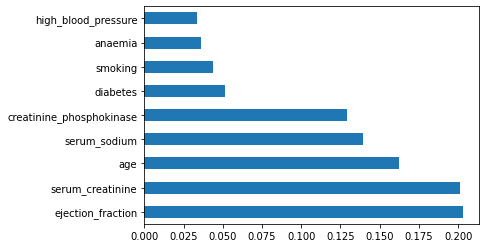

In [23]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [24]:
#Use if you want to select relevant items
sel_X = dataset[['age','creatinine_phosphokinase','ejection_fraction']]
sel_X

,age,creatinine_phosphokinase,ejection_fraction
0,75,582,20
1,55,7861,38
2,65,146,20
3,50,111,20
4,65,160,20
...,...,...,...
294,62,61,38
295,55,1820,38
296,45,2060,60
297,45,2413,38


# Decision Tree

Preliminary tree

In [25]:
from sklearn import tree
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(sel_X, Y,test_size=0.33, random_state=42)

In [27]:
classifier = tree.DecisionTreeClassifier(random_state = 42)
tree_model = classifier.fit(X_train,y_train)
tree_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(291.2275152439024, 1053.2250000000001, 'X[2] <= 22.5\ngini = 0.394\nsamples = 200\nvalue = [146, 54]'),
 Text(61.24390243902439, 985.2750000000001, 'X[0] <= 51.5\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(40.829268292682926, 917.325, 'X[0] <= 49.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(20.414634146341463, 849.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(61.24390243902439, 849.375, 'X[1] <= 346.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(40.829268292682926, 781.425, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(81.65853658536585, 781.425, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(81.65853658536585, 917.325, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(521.2111280487804, 985.2750000000001, 'X[0] <= 81.5\ngini = 0.344\nsamples = 186\nvalue = [145, 41]'),
 Text(371.2911585365853, 917.325, 'X[2] <= 32.5\ngini = 0.317\nsamples = 177\nvalue = [142, 35]'),
 Text(193.9390243902439, 849.375, 'X[0] <= 61.5\ngini = 0.454\nsamples =

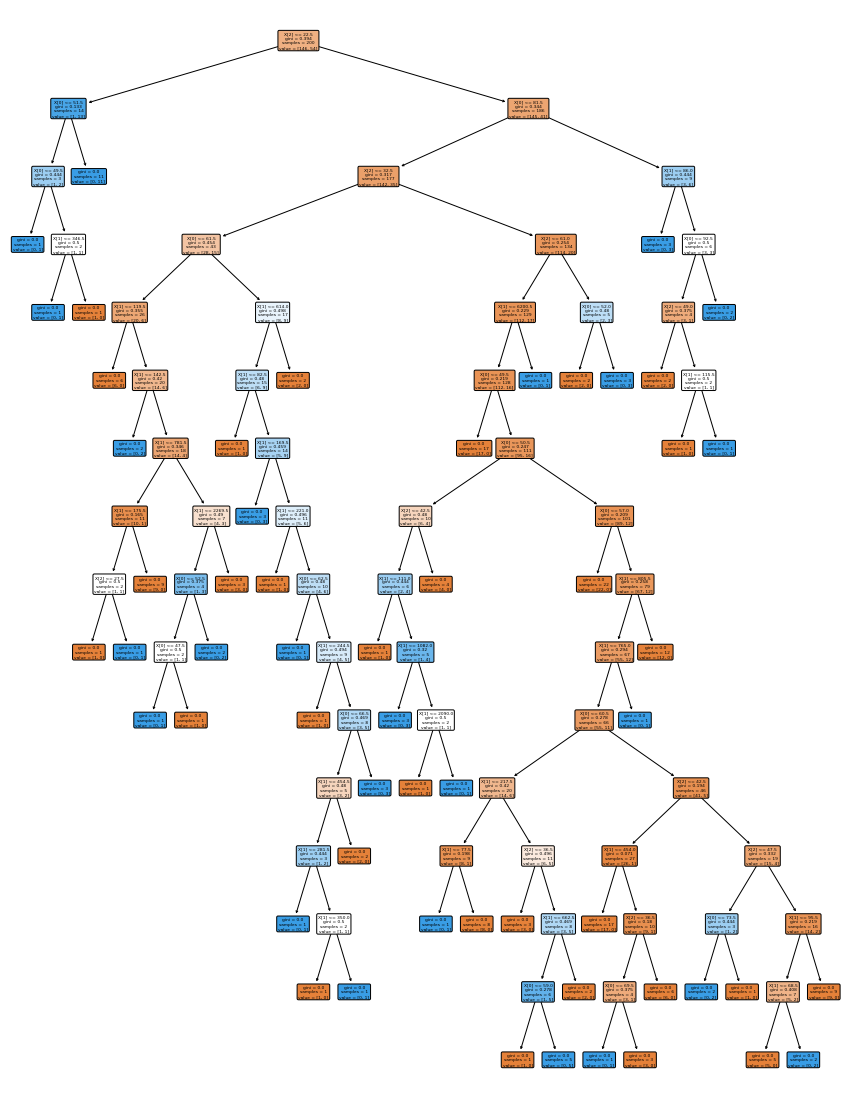

In [28]:
plt.figure(figsize=(15,20))
tree.plot_tree(tree_model,filled=True,rounded=True)

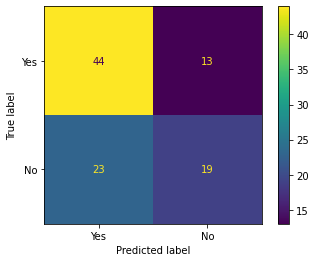

In [29]:
sklearn.metrics.plot_confusion_matrix(tree_model,X_test,y_test,display_labels=["Yes","No"])

In [30]:
tree_model = tree.DecisionTreeClassifier(random_state = 42)
tree_model = tree_model.fit(X_train,y_train)
tree_model
prediction = tree_model.predict(X_test)
prediction
print("The prediction accuracy for preliminary tree is: ",tree_model.score(X_test,y_test)*100,"%")

The prediction accuracy for preliminary tree is:  63.63636363636363 %


Cost Complexity Pruning

In [31]:
path = tree_model.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.00309524, 0.00320988, 0.00333333, 0.00375   ,
        0.00375   , 0.004     , 0.00412121, 0.00436364, 0.00454545,
        0.00533333, 0.00625   , 0.00635294, 0.00666667, 0.00688048,
        0.0069747 , 0.0072601 , 0.00752137, 0.0075969 , 0.00916763,
        0.01127618, 0.01296729, 0.0188327 , 0.06529063]),
 'impurities': array([0.        , 0.00928571, 0.01891534, 0.02558201, 0.03308201,
        0.04058201, 0.04858201, 0.06918807, 0.07791534, 0.08700625,
        0.09233959, 0.10483959, 0.11119253, 0.11785919, 0.20730547,
        0.22822956, 0.24274977, 0.2577925 , 0.2653894 , 0.27455703,
        0.29710939, 0.31007667, 0.32890937, 0.3942    ])}

In [32]:
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts=[]
for ccp_alpha in ccp_alphas:
  tree_model=tree.DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
  tree_model.fit(X_train,y_train)
  clf_dts.append(tree_model)

In [33]:
clf_dts

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0030952380952380958, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=42, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.003209876543209875, class_weight=None,
                        criterion='gini', m

In [34]:
train_scores = [tree_model.score(X_train,y_train) for tree_model in clf_dts] 
test_scores = [tree_model.score(X_test,y_test) for tree_model in clf_dts]

In [35]:
train_scores

[1.0,
 0.995,
 0.99,
 0.985,
 0.975,
 0.975,
 0.97,
 0.95,
 0.945,
 0.94,
 0.935,
 0.925,
 0.915,
 0.91,
 0.86,
 0.85,
 0.84,
 0.83,
 0.825,
 0.82,
 0.805,
 0.805,
 0.79]

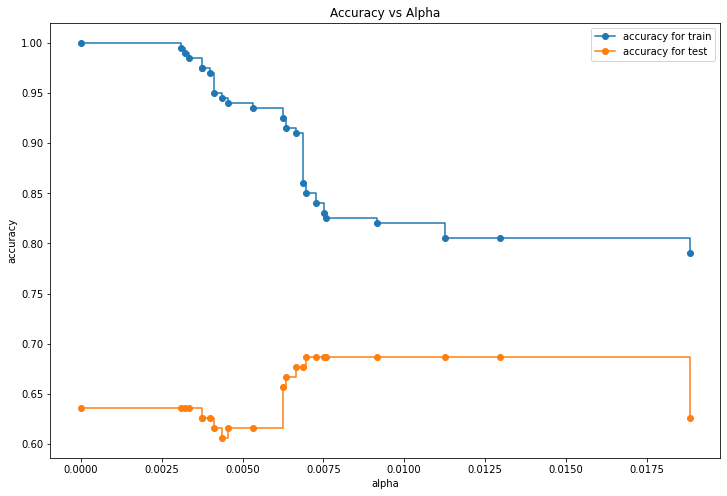

In [36]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs Alpha")
ax.plot(ccp_alphas,train_scores,marker= 'o',label = "accuracy for train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker= 'o',label="accuracy for test",drawstyle="steps-post")
ax.legend()
plt.show()

Pruning part 2 - Cross validation

In [37]:
tree_cross_model = tree.DecisionTreeClassifier(random_state =42, ccp_alpha = 0.012)
scores = sklearn.model_selection.cross_val_score(tree_cross_model,X_train,y_train,cv=5)
scores

array([0.775, 0.775, 0.675, 0.8  , 0.725])

In [38]:
df = pd.DataFrame(data ={'tree':range(5),'accuracy' : scores})
df

,tree,accuracy
0,0,0.775
1,1,0.775
2,2,0.675
3,3,0.800
4,4,0.725


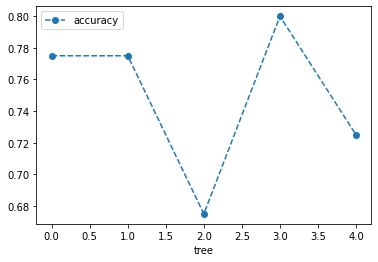

In [39]:
df.plot(x='tree',y='accuracy',marker="o",linestyle = '--')

In [40]:
alpha_values = []
for ccp_alpha in ccp_alphas:
  tree_model=tree.DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
  scores = sklearn.model_selection.cross_val_score(tree_model,X_train,y_train,cv=5)
  alpha_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

alpha_values

[[0.0, 0.6950000000000001, 0.024494897427831765],
 [0.0030952380952380958, 0.6950000000000001, 0.024494897427831765],
 [0.003209876543209875, 0.6950000000000001, 0.024494897427831765],
 [0.003333333333333333, 0.7, 0.015811388300841875],
 [0.00375, 0.7, 0.015811388300841875],
 [0.00375, 0.7, 0.015811388300841875],
 [0.003999999999999999, 0.7, 0.015811388300841875],
 [0.004121212121212121, 0.7, 0.015811388300841875],
 [0.004363636363636361, 0.7, 0.015811388300841875],
 [0.004545454545454546, 0.695, 0.018708286933869677],
 [0.005333333333333334, 0.7, 0.015811388300841875],
 [0.00625, 0.725, 0.04183300132670378],
 [0.006352941176470589, 0.73, 0.04301162633521313],
 [0.006666666666666666, 0.725, 0.044721359549995794],
 [0.006880482920086883, 0.735, 0.04358898943540673],
 [0.006974697469746975, 0.735, 0.04358898943540673],
 [0.0072601010101010065, 0.745, 0.050990195135927854],
 [0.007521367521367525, 0.75, 0.05477225575051661],
 [0.0075968992248062195, 0.74, 0.05830951894845302],
 [0.0091676

In [41]:
alpha_results_df = pd.DataFrame(alpha_values,columns = ["Alpha","Mean","Standard deviation"])
alpha_results_df

,Alpha,Mean,Standard deviation
0,0.000000,0.695,0.024495
1,0.003095,0.695,0.024495
2,0.003210,0.695,0.024495
3,0.003333,0.700,0.015811
4,0.003750,0.700,0.015811
5,0.003750,0.700,0.015811
6,0.004000,0.700,0.015811
7,0.004121,0.700,0.015811
8,0.004364,0.700,0.015811
9,0.004545,0.695,0.018708


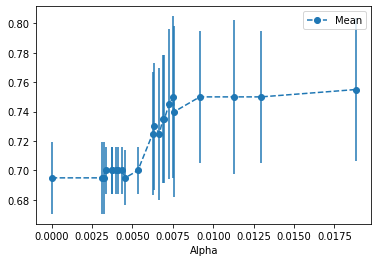

In [42]:
#plot
alpha_results_df.plot(x="Alpha",y="Mean",yerr="Standard deviation",marker = "o",linestyle="--")

In [43]:
#ccp = 0.010
c = alpha_results_df[(alpha_results_df['Alpha'] > 0.0075) & (alpha_results_df["Alpha"]< 0.0100)]
c

,Alpha,Mean,Standard deviation
17,0.007521,0.75,0.054772
18,0.007597,0.74,0.058310
19,0.009168,0.75,0.044721


In [44]:
ideal_alpha = c[c.Alpha == c.Alpha.max()]["Alpha"]
ideal_ccp = float(ideal_alpha)
ideal_ccp

0.009167631274334412

Build tree

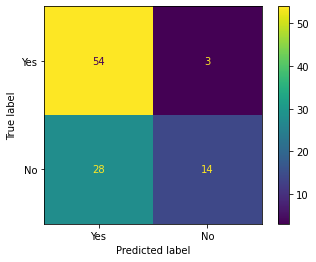

In [45]:
tree_pruned = tree.DecisionTreeClassifier(random_state = 42,ccp_alpha = ideal_ccp)
tree_pruned_model = tree_pruned.fit(X_train,y_train)
tree_pruned_model

sklearn.metrics.plot_confusion_matrix(tree_pruned_model,X_test,y_test,display_labels=["Yes","No"])

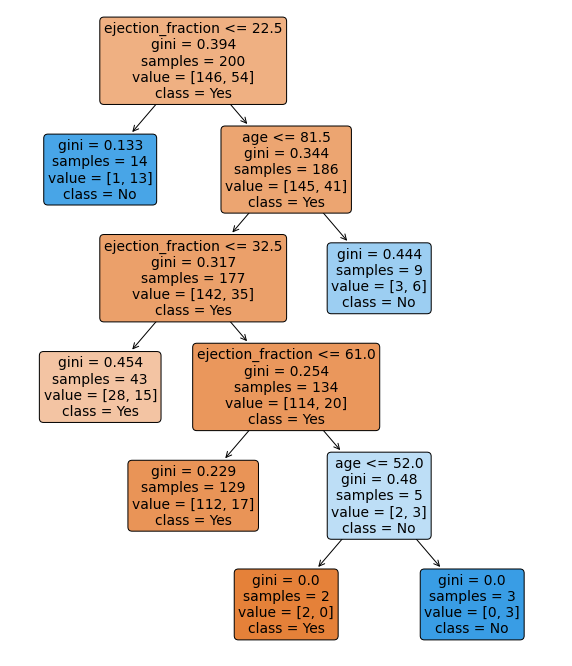

In [46]:
plt.figure(figsize=(10,12))
tree.plot_tree(tree_pruned_model,filled=True,rounded=True,class_names=["Yes","No"],feature_names=sel_X.columns);

In [50]:
tree_pruned = tree.DecisionTreeClassifier(random_state = 42,ccp_alpha = ideal_ccp)
tree_pruned_model = tree_pruned.fit(X_train,y_train)
prediction = tree_pruned_model.predict(X_test)
print("The accuracy after pruning is: ",tree_pruned_model.score(X_test,y_test)*100,"%")

The accuracy after pruning is:  68.68686868686868 %
